In [ ]:
# UMAP for our dataframe from parkinsonHW_features

import numpy as np
import umap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [ ]:
parkinsonhw_df = pd.read_csv('/work/5000_static_HW_features.csv')
parkinsonhw_df

,Subject ID,Category,Mean Velocity,Velocity Std,Peak Velocity,NVV,NIV,Mean Acceleration,Acceleration Std,Peak Acceleration,...,Jerk Std,Max Jerk,NIJ,NIC,Duration,Mean Pressure,Median Pressure,Peak Pressure,Pressure Std,Rate of Inversion in Pressure
0,C1,0,0.703885,0.217005,1.348997,0.000405,0.000827,0.005966,0.002655,0.016826,...,0.000119,0.000714,0.001764,0.001213,18137,903.158275,911.662819,942.150797,31.957461,0.014335
1,C2,0,0.534686,0.145519,0.942174,0.000295,0.000449,0.003323,0.001530,0.009769,...,0.000040,0.000246,0.001346,0.000775,24521,797.845936,797.117458,827.530771,16.812050,0.010929
2,C3,0,0.553975,0.131873,0.841240,0.000235,0.000337,0.003300,0.001425,0.009689,...,0.000066,0.000603,0.001153,0.000703,35559,858.824411,857.333402,898.178563,15.413758,0.007621
3,C4,0,0.619078,0.127862,0.925373,0.000308,0.000283,0.004502,0.002958,0.014318,...,0.000067,0.000378,0.001697,0.000943,21219,906.682695,911.657177,932.021419,15.900765,0.012677
4,C5,0,0.920545,0.308783,1.689903,0.000304,0.000504,0.009311,0.003459,0.020117,...,0.000077,0.000396,0.001656,0.001008,13886,938.469230,939.997156,1012.397667,43.842988,0.017212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,P_26060007,1,0.721720,0.386068,2.279587,0.000536,0.000749,0.007127,0.005320,0.039419,...,0.000267,0.002043,0.001853,0.001141,28056,441.441922,455.840891,534.582786,63.097754,0.002602
72,H_P000-0035,1,2.194296,1.555660,10.631417,0.019542,0.009555,0.525683,0.551930,3.476131,...,0.209974,1.712621,0.012325,0.008032,14442,751.183947,770.999043,943.227445,107.892895,0.011356
73,H_p000-0018,1,0.438107,0.164422,0.845937,0.000969,0.000969,0.005053,0.004425,0.032590,...,0.000246,0.002047,0.002406,0.001219,32002,680.490393,675.370153,747.815245,32.944722,0.008062
74,P_23100002,1,0.615477,0.183880,1.123466,0.000286,0.000480,0.004348,0.001980,0.009774,...,0.000059,0.000351,0.001508,0.000823,29174,963.167598,975.029465,1023.198683,38.682092,0.008295


In [ ]:
#61 PD, 15 control
print(parkinsonhw_df.Category.value_counts())

1    61
0    15
Name: Category, dtype: int64


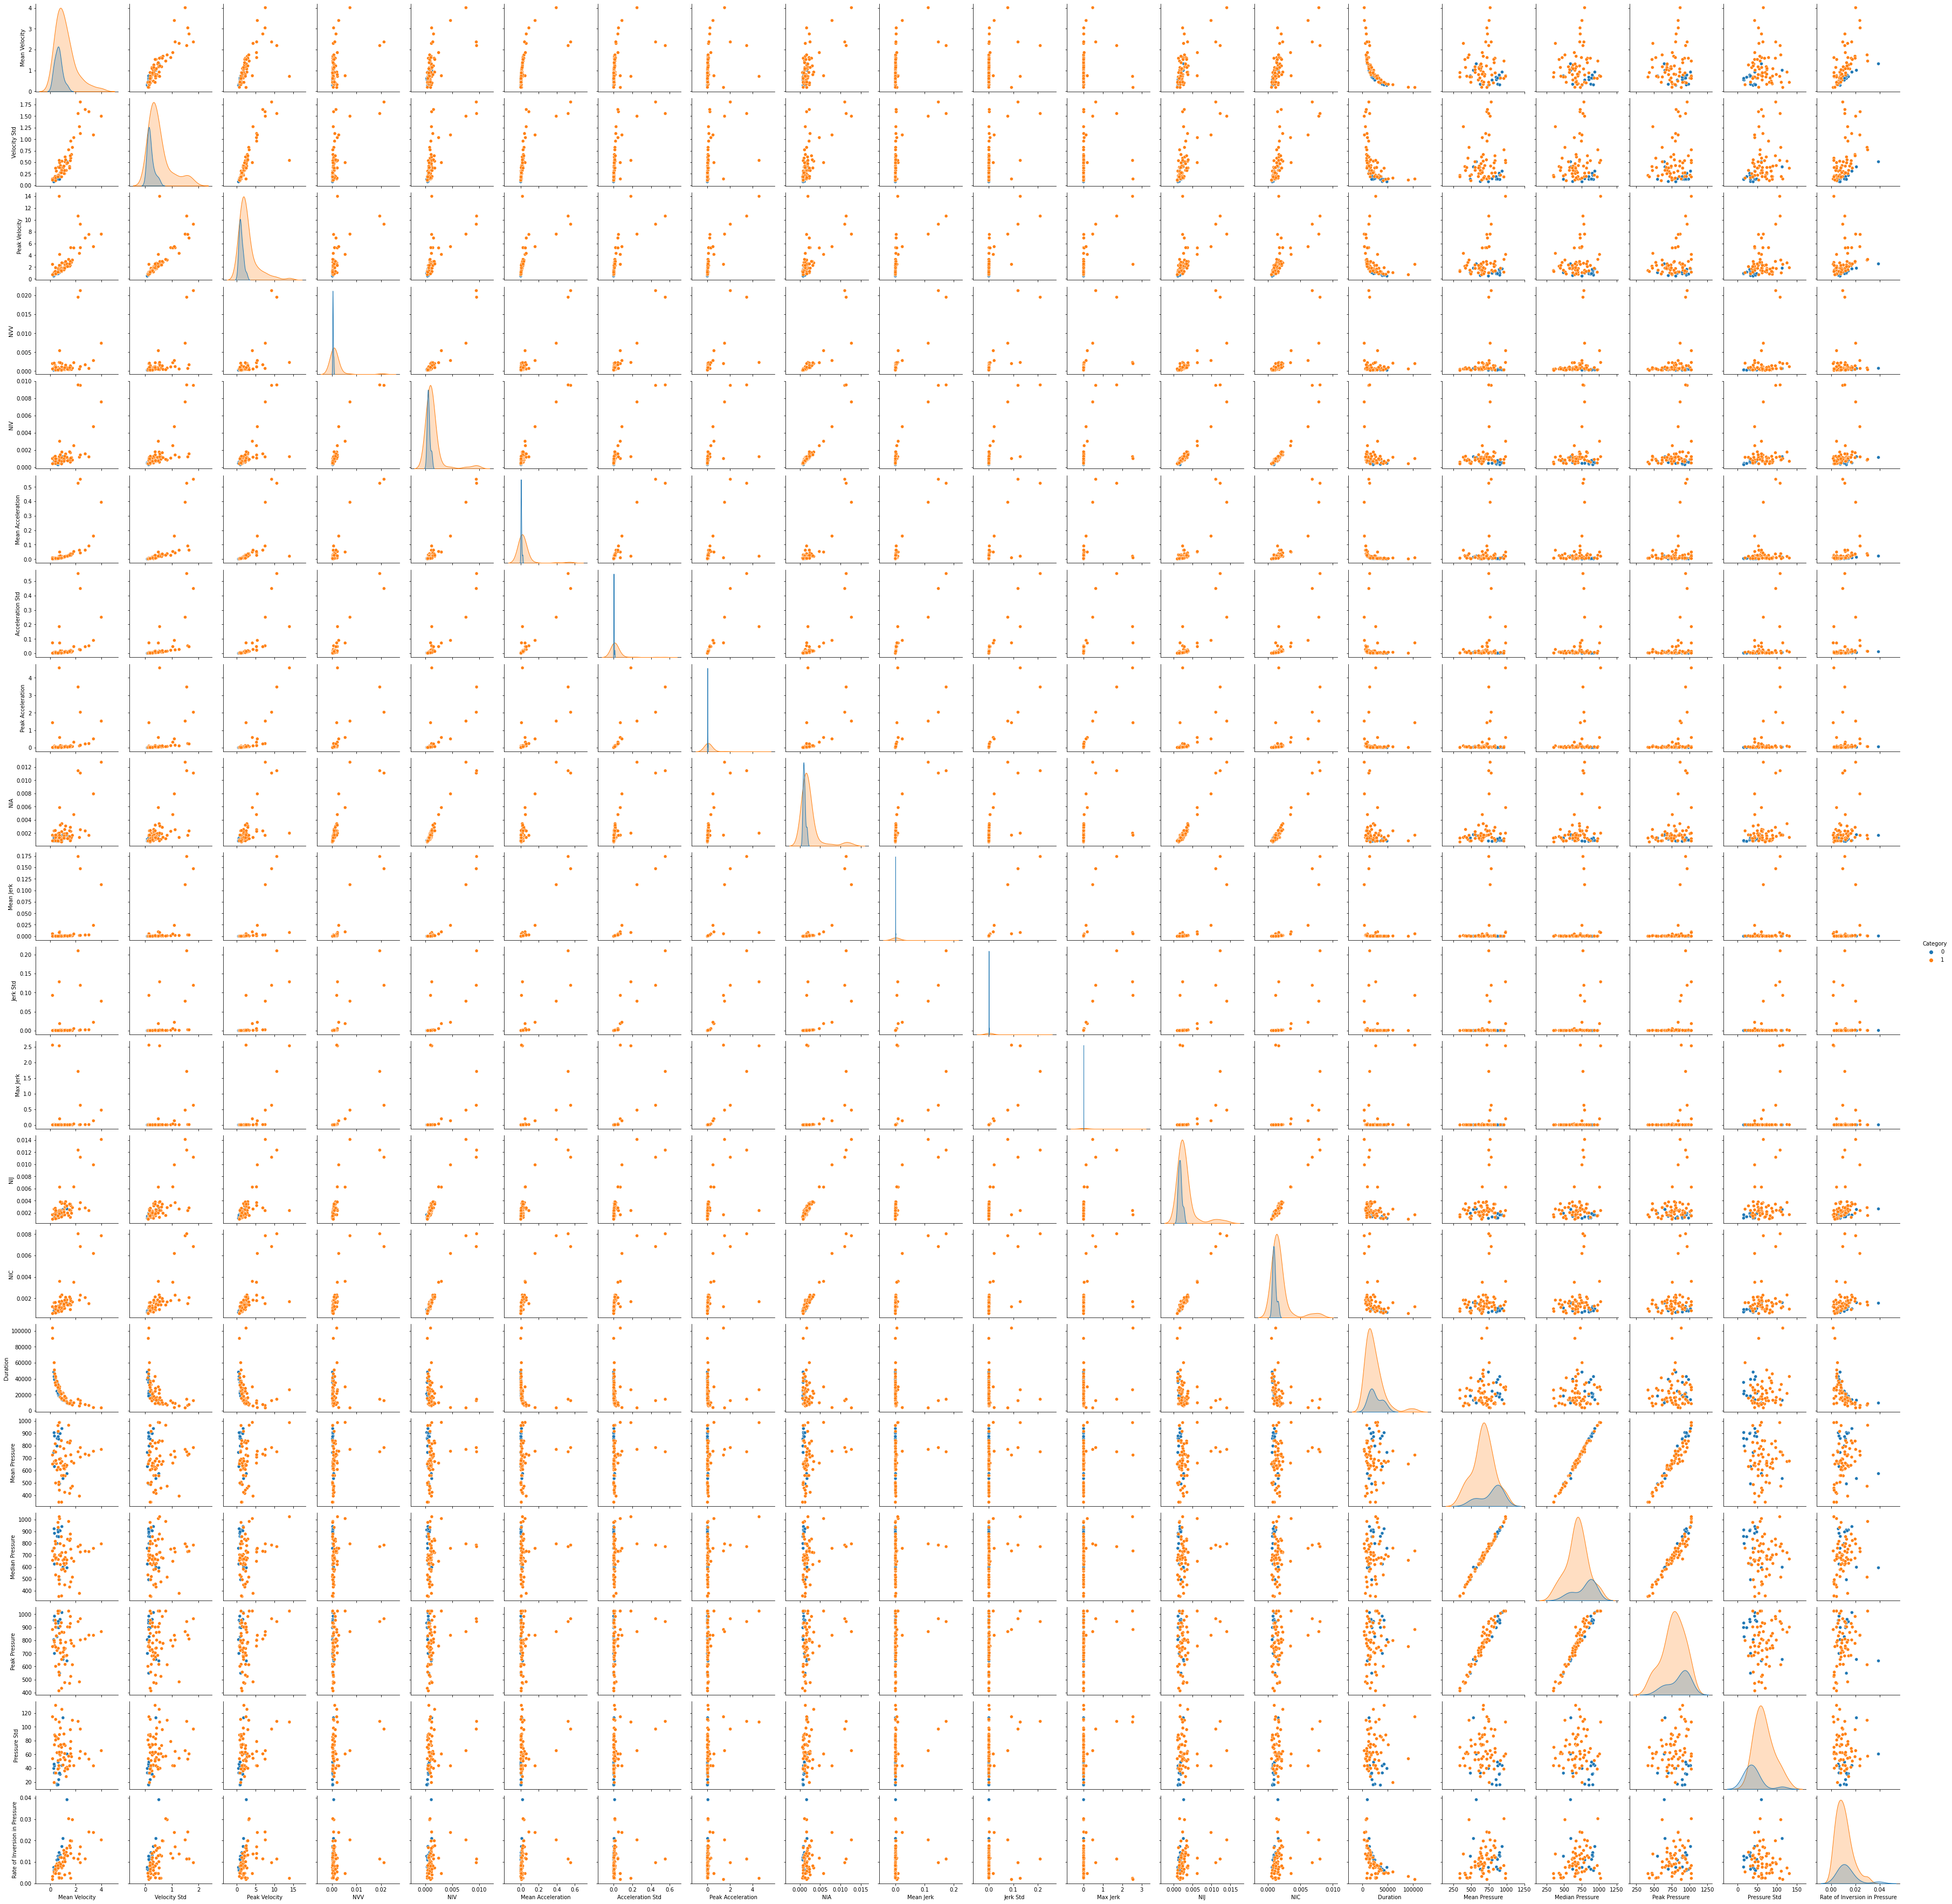

In [ ]:
#we can analyze the pairplots to find subsets of features that may allow umap to classify with more accuracy
sns.pairplot(parkinsonhw_df, hue='Category')

In [ ]:
#for higher dimensions change n_components
reducer = umap.UMAP(n_components=3)

In [ ]:
feature_columns = parkinsonhw_df.columns.tolist()[2:]

In [ ]:
feature_data = parkinsonhw_df[feature_columns].values
print(feature_data)

[[7.03885217e-01 2.17005327e-01 1.34899659e+00 ... 9.42150797e+02
  3.19574613e+01 1.43353366e-02]
 [5.34686024e-01 1.45519278e-01 9.42173707e-01 ... 8.27530771e+02
  1.68120495e+01 1.09294074e-02]
 [5.53975163e-01 1.31873305e-01 8.41240014e-01 ... 8.98178563e+02
  1.54137584e+01 7.62113670e-03]
 ...
 [4.38106947e-01 1.64422089e-01 8.45937389e-01 ... 7.47815245e+02
  3.29447224e+01 8.06199613e-03]
 [6.15477410e-01 1.83880166e-01 1.12346591e+00 ... 1.02319868e+03
  3.86820917e+01 8.29505724e-03]
 [1.52839107e+00 3.74454400e-01 2.51801336e+00 ... 9.01398699e+02
  5.02655216e+01 1.75653141e-02]]


In [ ]:
scaled_feature_data = StandardScaler().fit_transform(feature_data)
print(scaled_feature_data)

[[-0.49794917 -0.5955631  -0.49507609 ...  0.99150645 -1.12060591
   0.4760782 ]
 [-0.72556227 -0.77394202 -0.66631883 ...  0.25659099 -1.68701469
  -0.01943134]
 [-0.69961379 -0.80799278 -0.70880455 ...  0.70956728 -1.73930805
  -0.5007331 ]
 ...
 [-0.85548407 -0.7267739  -0.7068273  ... -0.25452539 -1.08368428
  -0.43659494]
 [-0.61687866 -0.67822021 -0.59000805 ...  1.51116559 -0.86911789
  -0.40268818]
 [ 0.61120704 -0.20268089 -0.00300536 ...  0.730214   -0.43592026
   0.94598951]]


In [ ]:
embedding = reducer.fit_transform(scaled_feature_data)
embedding.shape

(76, 3)

In [ ]:
embedding

array([[ 3.9566731 ,  3.2628303 ,  7.5048275 ],
       [ 4.472991  ,  3.6259792 ,  6.983326  ],
       [ 4.2697773 ,  3.568402  ,  6.7410703 ],
       [ 4.2409477 ,  3.3210104 ,  7.1455255 ],
       [ 3.7153952 ,  3.224095  ,  7.881095  ],
       [ 4.267736  ,  3.5425808 ,  7.352376  ],
       [ 3.8259287 ,  3.2527666 ,  7.444464  ],
       [ 1.5863416 ,  6.1063533 ,  6.00559   ],
       [ 2.279252  ,  5.7441945 ,  5.746955  ],
       [ 3.7557406 ,  3.4136777 ,  6.712631  ],
       [ 3.7631905 ,  3.678042  ,  6.497677  ],
       [ 3.7311304 ,  3.560061  ,  7.258498  ],
       [ 0.75725085,  5.0108604 ,  8.288339  ],
       [ 0.76602405,  4.9905787 ,  7.6151137 ],
       [ 0.3186032 ,  6.6851053 ,  7.4190717 ],
       [ 3.2077322 ,  3.480779  ,  7.457913  ],
       [ 2.8317974 ,  3.8759198 ,  8.073944  ],
       [ 0.30557835,  6.4503207 ,  6.827527  ],
       [ 1.2015173 ,  5.2657766 ,  6.1354356 ],
       [ 1.1046491 ,  6.105886  ,  7.309615  ],
       [ 0.887486  ,  6.2224803 ,  7.791

Text(0.5, 1.0, 'UMAP projection of the features_df_static dataset')

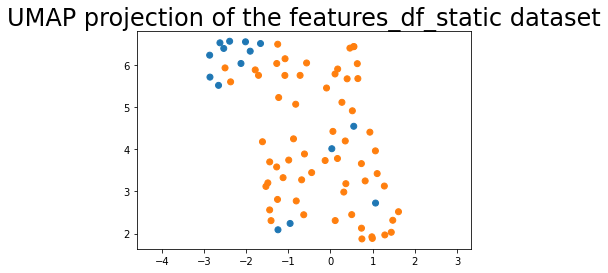

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in parkinsonhw_df.Category.map({0:0, 1:1})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the features_df_static dataset', fontsize=24)

In [ ]:
#umap - 2-d reduction plotted above
#note - since umap is a stochastic algorithm, it will give different plots each time it is performed

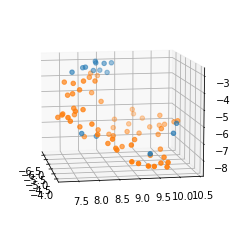

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(-embedding[:,0], embedding[:,1], -embedding[:,2],c=[sns.color_palette()[x] for x in parkinsonhw_df.Category.map({0:0, 1:1})])
ax.view_init(10, -10)


In [ ]:
#umap - 3-d reduction plotted above
#note - look at different subsets of data?

In [ ]:
for i in range(0, 100, 30):
    for j in range(0, 100, 30):
        ax.view_init(i, j)
        plt.draw()
        plt.pause(.001)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>